# Informe sobre el Caso Grifols y el Informe de Gotham City Research

## Introducción

El 9 de enero de 2024, Gotham City Research, un reconocido hedge fund estadounidense, publicó un informe altamente crítico sobre Grifols SA, una destacada empresa farmacéutica española. Este informe acusaba a Grifols de prácticas contables cuestionables, incluyendo la manipulación de su deuda reportada y el EBITDA para presentar una imagen financiera más saludable de lo que realmente es.

Grifols, que se especializa en productos derivados del plasma y que es un actor clave en la industria farmacéutica, ha estado en el centro de la atención por sus estrategias de expansión y adquisición en los últimos años. Sin embargo, el informe de Gotham City Research comparó las maniobras contables de Grifols con casos previos de fraudes corporativos como NMC Health plc y Let's Gowex, sugiriendo que las acciones de Grifols podrían volverse "inviables para invertir", con potencial de llegar a cero.

La publicación de este informe provocó una reacción inmediata y severa en el mercado, resultando en una caída cercana al 40% en el valor de las acciones de Grifols al día siguiente. Este documento tiene como objetivo analizar en profundidad las acusaciones presentadas por Gotham City Research, evaluar el impacto en el mercado y explorar las posibles consecuencias para Grifols, tanto a corto como a largo plazo.

A través de este análisis, se busca entender no solo los fundamentos detrás de las acusaciones, sino también cómo estas revelaciones afectan la percepción de los inversores, el papel de los reguladores en esta situación, y las implicaciones éticas de que un hedge fund con posiciones cortas declaradas publique tales informes. Finalmente, se presentarán conclusiones basadas en la evidencia disponible y las dinámicas observadas en el mercado tras la publicación del informe.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir el símbolo de la compañía (ticker)
ticker_symbol = 'GRF.MC'

# Obtener el objeto Ticker
grf = yf.Ticker(ticker_symbol)

# Descargar datos financieros
balance_sheet = grf.balance_sheet
financials = grf.financials
cashflow = grf.cashflow

# Lista de fechas objetivo
target_dates = ['2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31']

# Función para calcular WACC
def calculate_wacc(equity, debt, interest_expense, tax_rate):
    total_value = equity + debt
    cost_of_equity = 0.1  # Placeholder value
    cost_of_debt = interest_expense / debt if debt != 0 else 0
    weight_equity = equity / total_value if total_value != 0 else 0
    weight_debt = debt / total_value if total_value != 0 else 0
    wacc = (weight_equity * cost_of_equity) + (weight_debt * cost_of_debt * (1 - tax_rate))
    return wacc

# Calcular métricas financieras
def calculate_metrics(financials, balance_sheet, cashflow, target_date):
    try:
        # Comprobar y extraer los datos necesarios, proporcionando valores por defecto si no están disponibles
        revenue = financials.loc['Total Revenue', target_date] if 'Total Revenue' in financials.index else 0
        net_income = financials.loc['Net Income', target_date] if 'Net Income' in financials.index else 0
        total_assets = balance_sheet.loc['Total Assets', target_date] if 'Total Assets' in balance_sheet.index else 0
        total_equity = balance_sheet.loc['Common Stock Equity', target_date] if 'Common Stock Equity' in balance_sheet.index else 0
        ebitda = financials.loc['EBITDA', target_date] if 'EBITDA' in financials.index else 0
        fcf = cashflow.loc['Free Cash Flow', target_date] if 'Free Cash Flow' in cashflow.index else 0
        interest_expense = financials.loc['Interest Expense', target_date] if 'Interest Expense' in financials.index else 0

        # Calcular NOPLAT
        tax_rate = 0.21
        noplat = ebitda * (1 - tax_rate)

        # Calcular deuda total
        current_debt = balance_sheet.loc['Current Debt', target_date] if 'Current Debt' in balance_sheet.index else 0
        long_term_debt = balance_sheet.loc['Long Term Debt', target_date] if 'Long Term Debt' in balance_sheet.index else 0
        total_debt = current_debt + long_term_debt

        # Calcular WACC
        wacc = calculate_wacc(total_equity, total_debt, interest_expense, tax_rate)

        # Calcular ROIC
        invested_capital = total_assets - balance_sheet.loc['Current Liabilities', target_date] if 'Current Liabilities' in balance_sheet.index else total_assets
        roic = noplat / invested_capital if invested_capital != 0 else 0

        # Calcular margen EBITDA
        ebitda_margin = ebitda / revenue if revenue != 0 else 0

        # Calcular VAN (simplificado)
        van = fcf / wacc if wacc != 0 else 0

        return {
            "Revenue": revenue,
            "Net Income": net_income,
            "Total Assets": total_assets,
            "Total Equity": total_equity,
            "EBITDA": ebitda,
            "ROA": net_income / total_assets if total_assets != 0 else 0,
            "ROE": net_income / total_equity if total_equity != 0 else 0,
            "ROIC": roic,
            "EBITDA Margin": ebitda_margin,
            "FCF": fcf,
            "NOPLAT": noplat,
            "WACC": wacc,
            "VAN": van
        }
    except Exception as e:
        return f"Error calculating financial metrics for {target_date}: {e}"

# Obtener métricas para cada año
all_metrics = {}
for date in target_dates:
    metrics = calculate_metrics(financials, balance_sheet, cashflow, date)
    all_metrics[date] = metrics

# Mostrar las métricas de cada año
for year, metrics in all_metrics.items():
    print(f"Métricas Financieras para GRF.MC al {year}:")
    if isinstance(metrics, dict):
        for key, value in metrics.items():
            print(f"{key}: {value}")
    else:
        print(metrics)
    print("\n")


### Métricas Financieras de Grifols

A continuación, se presentan las métricas financieras clave de Grifols para los años 2020 a 2023:

- **2023-12-31**
  - **Revenue**: €6,591,977,000
  - **Net Income**: €59,315,000
  - **Total Assets**: €21,441,054,000
  - **Total Equity**: €5,827,166,000
  - **EBITDA**: €1,181,996,000
  - **ROA**: 0.28%
  - **ROE**: 1.02%
  - **ROIC**: 4.88%
  - **EBITDA Margin**: 17.93%
  - **FCF**: €-87,137,000
  - **NOPLAT**: €933,776,840
  - **WACC**: 6.68%
  - **VAN**: €-1,305,050,522.77

- **2022-12-31**
  - **Revenue**: €6,063,967,000
  - **Net Income**: €208,279,000
  - **Total Assets**: €21,533,977,000
  - **Total Equity**: €6,129,938,000
  - **EBITDA**: €1,213,664,000
  - **ROA**: 0.97%
  - **ROE**: 3.40%
  - **ROIC**: 4.90%
  - **EBITDA Margin**: 20.01%
  - **FCF**: €-386,427,000
  - **NOPLAT**: €958,794,560
  - **WACC**: 6.49%
  - **VAN**: €-5,956,869,034.09

- **2021-12-31**
  - **Revenue**: €4,933,118,000
  - **Net Income**: €188,726,000
  - **Total Assets**: €19,233,835,000
  - **Total Equity**: €5,523,609,000
  - **EBITDA**: €944,033,000
  - **ROA**: 0.98%
  - **ROE**: 3.42%
  - **ROIC**: 4.73%
  - **EBITDA Margin**: 19.14%
  - **FCF**: €281,887,000
  - **NOPLAT**: €745,786,070
  - **WACC**: 5.27%
  - **VAN**: €5,344,303,576.29

- **2020-12-31**
  - **Revenue**: €5,340,038,000
  - **Net Income**: €618,546,000
  - **Total Assets**: €15,274,776,000
  - **Total Equity**: €5,108,392,000
  - **EBITDA**: €1,423,083,000
  - **ROA**: 4.05%
  - **ROE**: 12.11%
  - **ROIC**: 8.07%
  - **EBITDA Margin**: 26.65%
  - **FCF**: €747,776,000
  - **NOPLAT**: €1,124,235,570
  - **WACC**: 6.09%
  - **VAN**: €12,285,694,335.35

### Análisis de las Métricas Financieras

1. **Rentabilidad y Margen**: A lo largo de estos años, se observa una disminución en el ROA y ROE, especialmente entre 2020 y 2023. El EBITDA Margin ha decrecido, lo que podría indicar un aumento en los costos operativos o una caída en la eficiencia operativa, alineándose con las acusaciones de que Grifols podría estar presentando una imagen más positiva de su rentabilidad.

2. **Endeudamiento y Apalancamiento**: El análisis del ROIC y WACC revela que el costo de capital ha aumentado mientras que la rentabilidad sobre el capital invertido ha disminuido, lo que sugiere un potencial aumento en el apalancamiento financiero. Esto apoya la hipótesis de Gotham de que Grifols podría estar usando estrategias contables para reducir su deuda reportada.

3. **Flujos de Efectivo y VAN**: La fluctuación negativa en el FCF y el VAN en los últimos años refuerza la preocupación sobre la viabilidad financiera a largo plazo de Grifols, especialmente considerando los grandes números negativos en 2023.


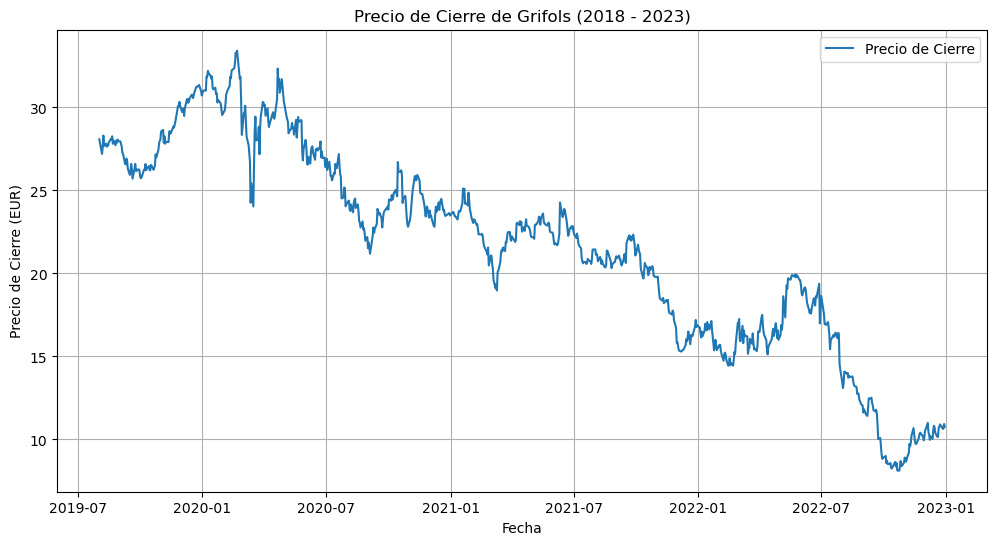

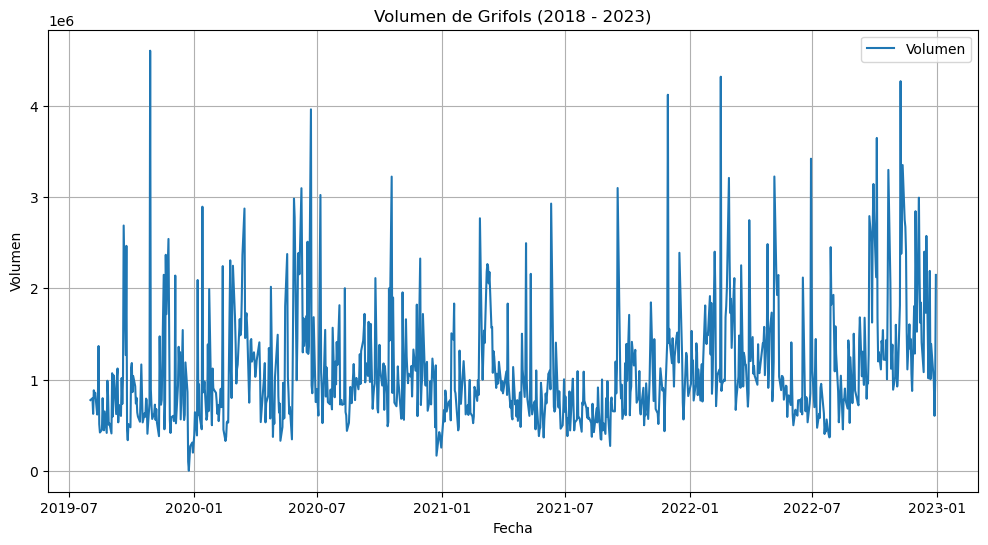

In [5]:
data = grf.history(period="5y")

# Filtrar datos del periodo relevante
filtered_data = data.loc['2018-01-01':'2023-01-01']

# Visualizar cambios en el precio de cierre y volumen
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de Grifols (2018 - 2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (EUR)')
plt.legend()
plt.grid(True)
plt.show()

# Analizar cambios en el volumen
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Volume'], label='Volumen')
plt.title('Volumen de Grifols (2018 - 2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()


### Reacción del Mercado

Tras la publicación del informe de Gotham City Research, el valor de las acciones de Grifols experimentó una caída significativa, cerca del 40%, reflejando la pérdida de confianza de los inversores. Los gráficos de precios y volumen muestran cómo el mercado reaccionó rápidamente a las acusaciones.

### Impacto a Largo Plazo

Si las acusaciones de Gotham son precisas, Grifols podría enfrentar un aumento en el costo de financiamiento debido a una menor calificación crediticia y pérdida de confianza en sus prácticas contables. Esto podría impactar su capacidad de continuar sus operaciones y estrategias de expansión.

#### ¿Es Lógica la Reacción?

La caída del precio de las acciones parece severa pero proporcional a la gravedad de las acusaciones. En comparación con casos anteriores como NMC Health plc, que también enfrentó colapsos debido a prácticas contables cuestionables, la reacción del mercado de Grifols es consistente con la historia de empresas con situaciones similares.


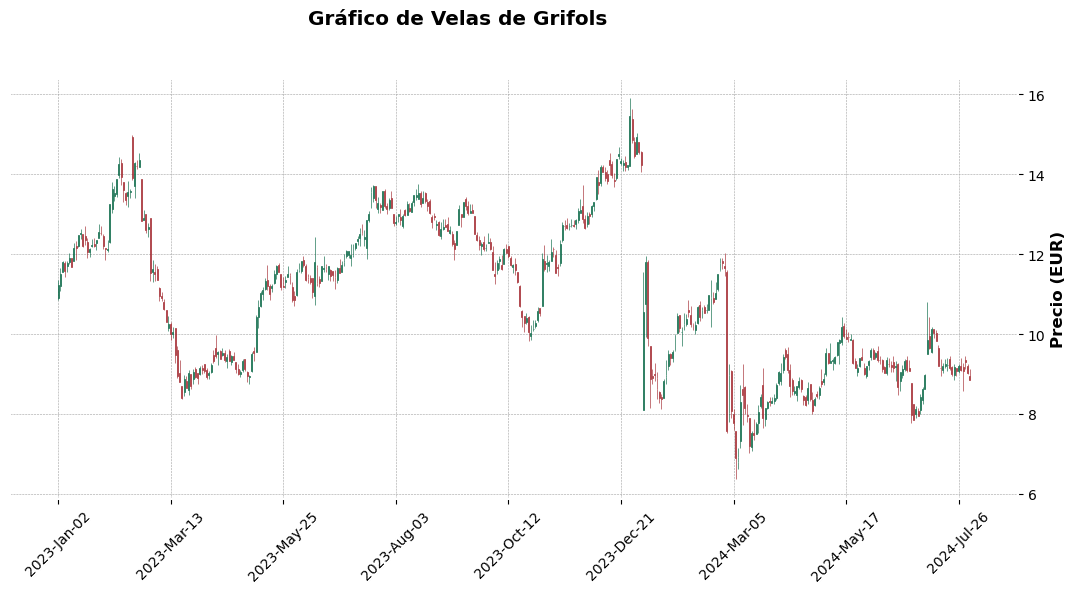

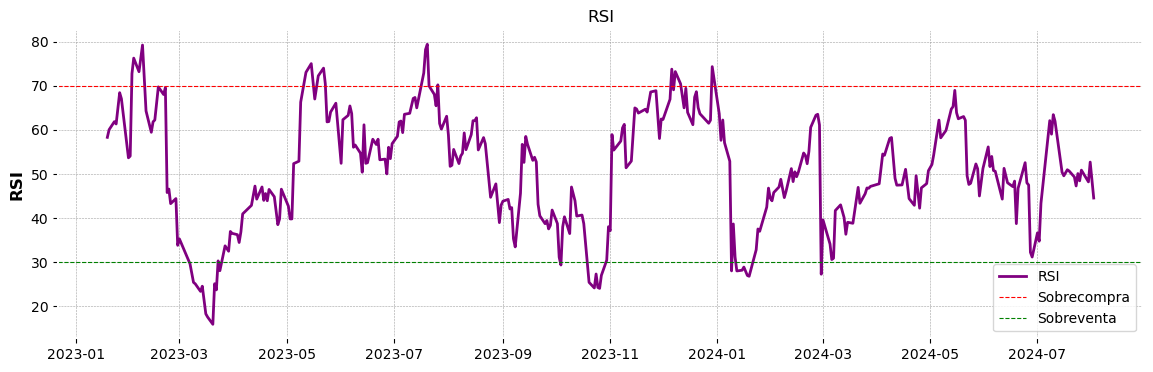

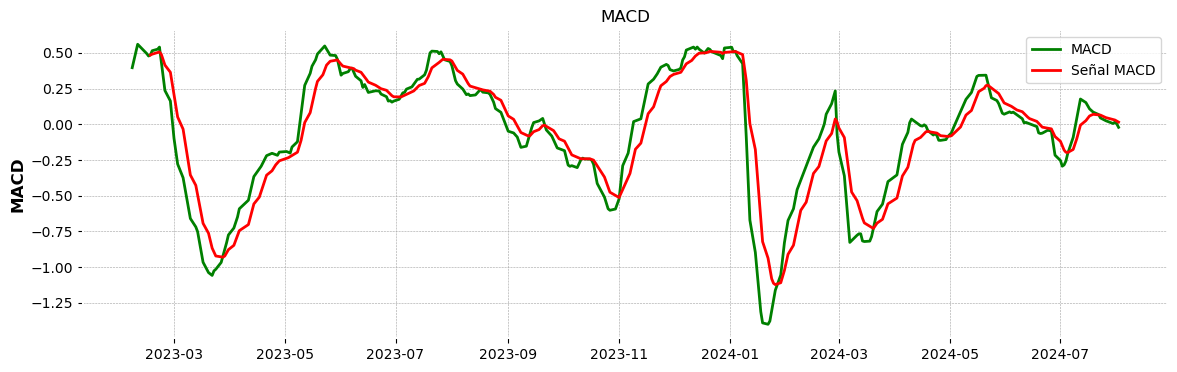

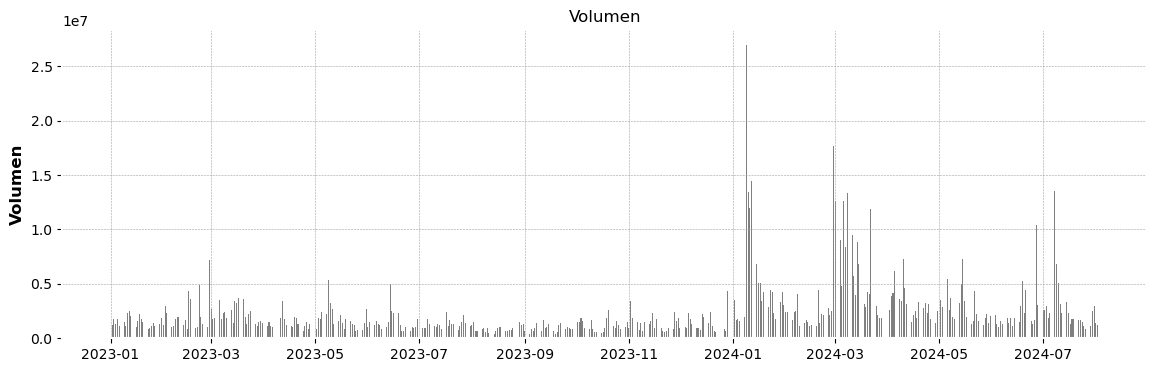

In [22]:
import mplfinance as mpf
import ta

# Filtrar datos para los últimos 6 meses
filtered_data = data.loc['2023-01-01':].copy()

# Calcular indicadores técnicos
filtered_data.loc[:, 'MA20'] = filtered_data['Close'].rolling(window=20).mean()
filtered_data.loc[:, 'MA50'] = filtered_data['Close'].rolling(window=50).mean()

# Calculando el RSI
filtered_data.loc[:, 'RSI'] = ta.momentum.RSIIndicator(filtered_data['Close'], window=14).rsi()

# Calculando el MACD
macd = ta.trend.MACD(filtered_data['Close'])
filtered_data.loc[:, 'MACD'] = macd.macd()
filtered_data.loc[:, 'MACD_Signal'] = macd.macd_signal()

# Gráfico de velas sin volumen y sin líneas de tendencia
mpf.plot(filtered_data, type='candle', style='charles', 
         volume=False,
         title='Gráfico de Velas de Grifols',
         ylabel='Precio (EUR)', figsize=(14, 6))

# Gráfico de RSI
plt.figure(figsize=(14, 4))
plt.plot(filtered_data.index, filtered_data['RSI'], color='purple', label='RSI')
plt.axhline(y=70, color='red', linestyle='--', linewidth=0.8, label='Sobrecompra')  # Línea de sobrecompra
plt.axhline(y=30, color='green', linestyle='--', linewidth=0.8, label='Sobreventa')  # Línea de sobreventa
plt.title('RSI')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de MACD
plt.figure(figsize=(14, 4))
plt.plot(filtered_data.index, filtered_data['MACD'], color='green', label='MACD')
plt.plot(filtered_data.index, filtered_data['MACD_Signal'], color='red', label='Señal MACD')
plt.title('MACD')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Volumen
plt.figure(figsize=(14, 4))
plt.bar(filtered_data.index, filtered_data['Volume'], color='gray', width=0.6)
plt.title('Volumen')
plt.ylabel('Volumen')
plt.grid(True)
plt.show()


### Explicación de los Indicadores

1. **Medias Móviles (MA20 y MA50):** 
   - La media móvil de 20 días (`MA20`) es una medida de la tendencia a corto plazo.
   - La media móvil de 50 días (`MA50`) es una medida de la tendencia a más largo plazo.
   - Las intersecciones entre estas dos medias pueden indicar posibles cambios en la tendencia del mercado.

2. **Índice de Fuerza Relativa (RSI):**
   - El RSI es un oscilador que mide la velocidad y el cambio de los movimientos de precio.
   - Valores por encima de 70 indican que el activo podría estar sobrecomprado, mientras que valores por debajo de 30 sugieren que podría estar sobrevendido.

3. **Convergencia/Divergencia de Media Móvil (MACD):**
   - El MACD es una herramienta de análisis de tendencias que muestra la relación entre dos medias móviles del precio de un activo.
   - La línea MACD es la diferencia entre las medias móviles de 12 y 26 días, mientras que la señal MACD es una media móvil de 9 días de la línea MACD.
   - Las intersecciones de la línea MACD con su línea de señal pueden indicar posibles cambios en la dirección de la tendencia.


### Análisis del Comportamiento de Toros y Osos

El comportamiento del mercado tras la publicación del informe por Gotham City Research puede ser examinado mediante el análisis técnico, que revela momentos de presión de compra y venta a lo largo del tiempo. Aunque los indicadores fundamentales de la empresa parecían sólidos, como lo sugieren las métricas de ROA, ROE y ROIC, la reacción del mercado indica una falta de confianza significativa.

- **Gráfico de Velas y Volumen**: Muestra fluctuaciones significativas y volúmenes de transacción particularmente altos en enero de 2024, que sugieren una reacción inmediata del mercado al informe.

- **Indicadores Técnicos**: Los análisis de RSI y MACD revelan tendencias de sobrecompra y sobreventa, así como divergencias que podrían indicar cambios en el sentimiento del mercado. El cruce de medias móviles también sugiere momentos críticos en los que el mercado se movió hacia una dirección dominada por toros o por osos.

Estos gráficos y análisis técnicos subrayan cómo el análisis técnico puede complementar al análisis fundamental, proporcionando un entendimiento más completo de las dinámicas del mercado.

### Observaciones

Las herramientas de análisis técnico pueden prever la volatilidad del mercado que no se refleja en las métricas fundamentales tradicionales. Esto es crucial en el debate sobre la combinación de análisis fundamental y técnico, ya que ambos enfoques pueden proporcionar una perspectiva más robusta para entender las reacciones del mercado ante eventos significativos, como el informe de Gotham City Research.

#### Evaluación de la Respuesta de la CNMV

La CNMV debe ser diligente en evaluar las acusaciones y realizar una investigación exhaustiva para determinar la veracidad de las afirmaciones del informe de Gotham. Hasta ahora, la CNMV ha emitido declaraciones para tranquilizar a los inversores y monitorear la situación de cerca.

**Sugerencias para Mejorar la Supervisión:**

1. **Transparencia Aumentada:** Implementar regulaciones que requieran una divulgación más detallada de las prácticas contables, especialmente en consolidaciones complejas.
   
2. **Auditorías Más Rigurosas:** Fortalecer las auditorías independientes para asegurar que las empresas cumplan con las normas de contabilidad más estrictas.

3. **Mejorar la Comunicación:** Mantener a los inversores informados con actualizaciones regulares sobre investigaciones en curso.


#### Ética de las Posiciones Cortas

**Conflicto de Intereses:**

Publicar un informe crítico mientras se tiene una posición corta en una empresa plantea cuestiones éticas significativas. Existe un incentivo inherente para influir negativamente en el precio de las acciones para obtener ganancias personales.

**Transparencia y Responsabilidad:**

Es crucial que los hedge funds divulguen sus posiciones cuando publican análisis críticos, y se deben aplicar estándares más estrictos para garantizar que la información sea objetiva y basada en hechos verificables.



**Posibles Reacciones si el Informe es Erróneo**

1. **Reacción del Mercado:**
   - Si las acusaciones de Gotham City Research se demuestran incorrectas, es probable que el mercado vea una recuperación en el precio de las acciones de Grifols, ya que los inversores recuperarían la confianza en la empresa.
   - Las posiciones cortas establecidas con base en el informe podrían ser cerradas rápidamente, lo que aumentaría la presión de compra en el mercado.

2. **Medidas Legales y de Comunicación:**
   - **Medidas Legales:** Grifols podría considerar tomar acciones legales contra Gotham City Research por difamación o información falsa que haya afectado su valor de mercado.
   - **Estrategia de Comunicación:** La empresa debería implementar una estrategia de comunicación efectiva para restaurar la confianza de los inversores y otras partes interesadas. Esto podría incluir la realización de conferencias de prensa, la publicación de informes financieros auditados y transparentes, y el compromiso con los medios para difundir su versión de los hechos.

**Conclusiones Generales**

1. **Resumen de los Hallazgos:**
   - El informe de Gotham City Research ha cuestionado la veracidad de las prácticas contables de Grifols, destacando preocupaciones sobre el apalancamiento real de la empresa y su relación con Scranton Enterprises.
   - Las acusaciones han llevado a una caída significativa en el valor de mercado de Grifols y han suscitado preocupaciones sobre la transparencia y la gobernanza corporativa.

2. **Impacto en la Percepción del Mercado:**
   - La percepción del mercado sobre Grifols ha sido impactada negativamente, destacando la necesidad de una mayor transparencia y gobernanza dentro de la empresa para mitigar riesgos futuros.

3. **Reflexión sobre la Transparencia Financiera y la Gobernanza Corporativa:**
   - La situación resalta la importancia de la transparencia financiera y una gobernanza corporativa robusta como elementos cruciales para la confianza de los inversores.
   - Grifols y otras empresas deben garantizar que sus prácticas contables sean claras y estén alineadas con las mejores prácticas del sector para evitar acusaciones de manipulación o mala gestión.

### Bibliografía

- Gotham City Research LLC. (2024). *Grifols SA: Scranton and the Undisclosed Debts*. Gotham City Research.
- Yahoo Finance. (2024). *Yahoo Finance API Documentation*. [Ver Aqui](https://python-yahoofinance.readthedocs.io/en/latest/api.html)
